In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import pandas as pd

array([[6.        , 6.        , 6.        , ..., 6.        , 6.        ,
        6.        ],
       [6.06122449, 6.06122449, 6.06122449, ..., 6.06122449, 6.06122449,
        6.06122449],
       [6.12244898, 6.12244898, 6.12244898, ..., 6.12244898, 6.12244898,
        6.12244898],
       ...,
       [8.87755102, 8.87755102, 8.87755102, ..., 8.87755102, 8.87755102,
        8.87755102],
       [8.93877551, 8.93877551, 8.93877551, ..., 8.93877551, 8.93877551,
        8.93877551],
       [9.        , 9.        , 9.        , ..., 9.        , 9.        ,
        9.        ]])

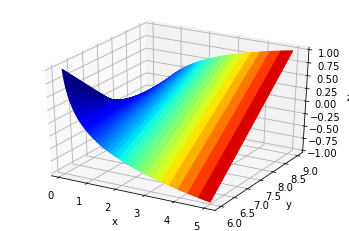

In [15]:
# domains
x = np.logspace(-1.,np.log10(5),50) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)            # [-1, 1]

# convert to 2d matrices
Z = np.outer(z.T, z)        # 50x50
X, Y = np.meshgrid(x, y)    # 50x50

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = X # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Min cost point for:
Nu            0.405000
Mu            0.300700
Alpha       -34.000000
TotalCost     0.030805
Name: 157, dtype: float64


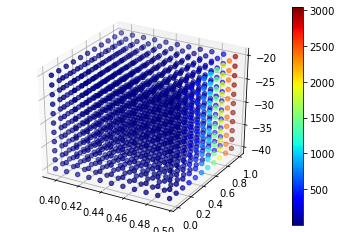

In [62]:
NPoints = 10

# Optimization Parameters
ConstitutiveModels = ['Ogden', 'Neo-Hookean']
ConstitutiveModel = ConstitutiveModels[0]

BCsTypes = ['Ideal', 'Fixed']
BCsType  = BCsTypes[1]


NumberElementsTested = [1, 2, 3, 5, 10, 20]
NumberElements = NumberElementsTested[0]

# Folder for the results
Output_Path = os.path.join('CostFunctionShape', BCsType, ConstitutiveModel)
os.makedirs(Output_Path, exist_ok=True)

FileName = str(NumberElements) + 'Elements' + str(NPoints) + '³Points.csv'

# Cost Function Data
CostData = pd.read_csv(os.path.join(Output_Path, FileName), sep=',', decimal='.')

# Row with the minimum cost
print('Min cost point for:')
print(CostData.loc[CostData['TotalCost'].idxmin()])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Nus    = CostData.Nu
Mus    = CostData.Mu
Alphas = CostData.Alpha
Costs  = CostData.TotalCost

img = ax.scatter(Nus, Mus, Alphas, c=Costs, cmap=plt.jet())
fig.colorbar(img)
plt.show()